<a href="https://colab.research.google.com/github/rajagurunath/imgCap/blob/master/datamining_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Data Mining (2IMM20)
 ### Homework Assignment 1D
 ### Subspace Clustering
 

## Preamble
We are going to explore data mining algorithms in Python. Hence, we recommend that you implement
your solutions to the following questions in a Jupyter Python notebook. You are free to select another
programming language were you so inclined, but if you do, the burden is upon you to provide detailed
instructions on the requirements to get your solutions to work in an accompanying README file.


A general Python implementation of subspace clustering is not publicly available at the moment, neither
for arbitrarily oriented nor for axis-parallel subspace clustering. However, for smaller datasets, we can
explore axis-parallel subspace clustering by hand, using the standard k-means clustering implementation
available in scikit-learn. You can find all the information you need about the relevant sklearn.
cluster module at http://scikit-learn.org/stable/modules/clustering.html.


We are going to reconstruct the clustering of the Iris dataset into three categories in various subspaces,
and compare the results. You can find the Iris dataset in ARFF form at www.cas.mcmaster.ca/~cs4tf3/
iris.arff. If you are interested in more details, have a look at https://en.wikipedia.org/wiki/
Iris_flower_data_set.



N.B.: in order to give the correct answers to the following questions, you may need to solve a simple
version of the Assignment Problem [1], for instance using the Hungarian Algorithm [2].


## Axis-Parallel Subspace Clustering (20 points)
- α. (6 points) Use the k-means algorithm with k = 3 to cluster the Iris dataset, over the whole 4-
dimensional input space. How well do the clusters match the actual labels?


- β. (4 points) Project the dataset axis-parallel onto the dimensions Sepal.Length and Sepal.Width
(hint: probably the easiest way of doing this is by simply throwing away the other columns). Then,
run the k-means algorithm with k = 3 again on the projected dataset. Do the results improve?
Do they deteriorate?


- γ. (10 points) Repeat the previous exercise with each possible two-dimensional axis-parallel subspace
(i.e.: five more times). In which subspace does the clustering mimic the true labels of the dataset
most closely? Which type of Iris most often ends up in a wrong cluster? Which records are
particularly difficult to cluster?

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

import seaborn as sns
from scipy.io import arff
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
#sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

In [60]:
plt.style.available

['bmh',
 'seaborn-paper',
 'seaborn-dark',
 'tableau-colorblind10',
 'seaborn-dark-palette',
 'dark_background',
 'Solarize_Light2',
 'seaborn-notebook',
 'fivethirtyeight',
 'seaborn-darkgrid',
 'seaborn-poster',
 'seaborn-colorblind',
 'seaborn-deep',
 'seaborn-muted',
 'classic',
 'seaborn-pastel',
 'ggplot',
 'seaborn-talk',
 'seaborn-bright',
 'seaborn-white',
 'grayscale',
 'seaborn',
 '_classic_test',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'fast']

In [11]:
data=load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
iris_df=pd.DataFrame(data.data,columns=data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [0]:
def evaluate_clustering(pred):
  cm=pd.DataFrame(confusion_matrix(data.target,pred),columns=data.target_names,index=data.target_names)
  print(tabulate(cm, headers='keys', tablefmt='psql'))
  sns.heatmap(cm,annot=True)
  score=accuracy_score(data.target,pred)
  plt.title(f"clustering score -{score}")
  plt.show()
  return score

### α. (6 points) Use the k-means algorithm with k = 3 to cluster the Iris dataset, over the whole 4- dimensional input space. How well do the clusters match the actual labels?

- Accuracy score for the Kmeans Algorithm for the given dataaset with k=3 and with 4 dimensional data gives **0.89** 



+------------+----------+--------------+-------------+
|            |   setosa |   versicolor |   virginica |
|------------+----------+--------------+-------------|
| setosa     |       50 |            0 |           0 |
| versicolor |        0 |           48 |           2 |
| virginica  |        0 |           14 |          36 |
+------------+----------+--------------+-------------+


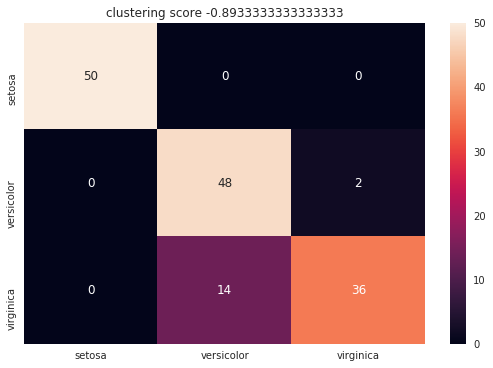

0.8933333333333333

In [113]:
cluster1=KMeans(n_clusters=3)
pred=cluster1.fit_predict(iris_df.values)
evaluate_clustering(pred)

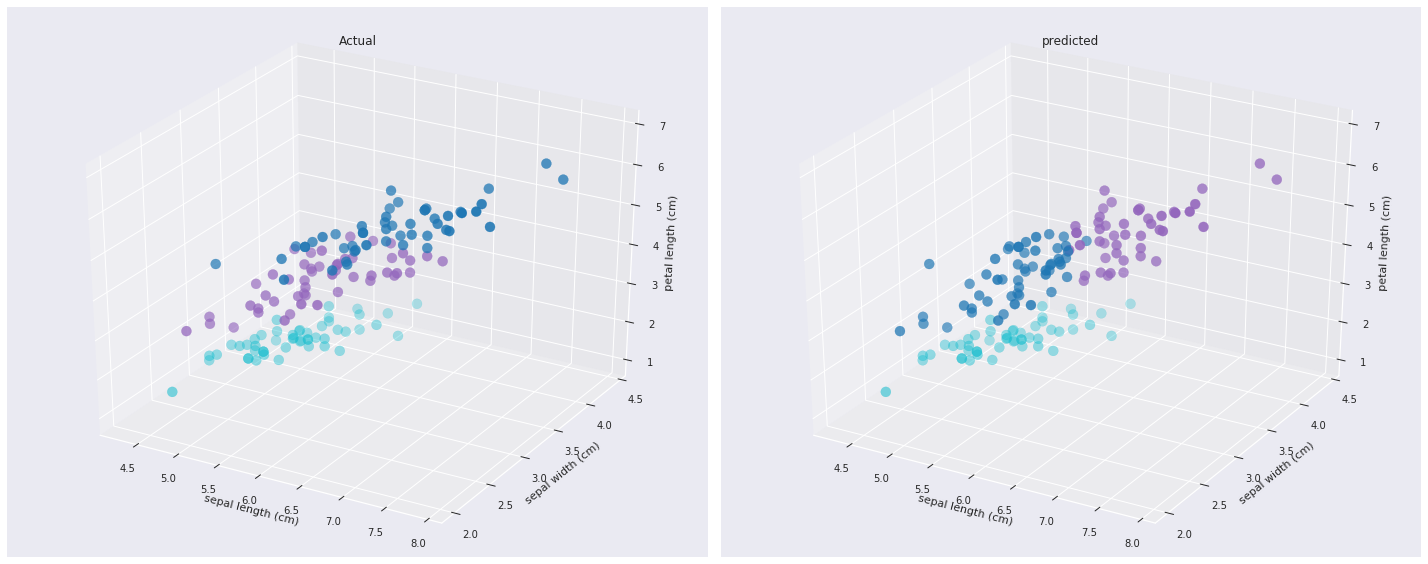

In [125]:
fig = plt.figure(figsize=(20,8))
xyz_names=data.feature_names
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(iris_df.iloc[:,0],iris_df.iloc[:,1],iris_df.iloc[:,2],c=data.target,marker='o',cmap='tab10_r',s=100)
ax1.set_title("Actual")
ax1.set_xlabel(xyz_names[0])
ax1.set_ylabel(xyz_names[1])
ax1.set_zlabel(xyz_names[2])

ax2=fig.add_subplot(122,projection='3d')
ax2.scatter(iris_df.iloc[:,0],iris_df.iloc[:,1],iris_df.iloc[:,2],c=pred,marker='o',cmap='tab10_r',s=100)
ax2.set_title("predicted")
ax2.set_xlabel(xyz_names[0])
ax2.set_ylabel(xyz_names[1])
ax2.set_zlabel(xyz_names[2])
plt.tight_layout()
#plt.title("Clustering Iris dataset")
plt.show()

### β. (4 points) Project the dataset axis-parallel onto the dimensions Sepal.Length and Sepal.Width (hint: probably the easiest way of doing this is by simply throwing away the other columns). Then, run the k-means algorithm with k = 3 again on the projected dataset. Do the results improve? Do they deteriorate?


- As shown in the below analysis, results didnt improved the accuracy score went down to **0.51333**


In [120]:
iris_df.iloc[:,:-2].head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


+------------+----------+--------------+-------------+
|            |   setosa |   versicolor |   virginica |
|------------+----------+--------------+-------------|
| setosa     |       50 |            0 |           0 |
| versicolor |        0 |           12 |          38 |
| virginica  |        0 |           35 |          15 |
+------------+----------+--------------+-------------+


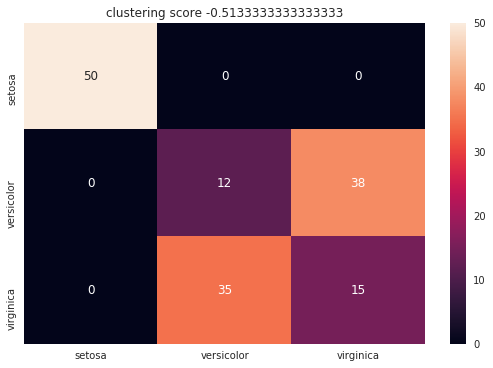

0.5133333333333333

In [121]:
cluster1=KMeans(n_clusters=3)
pred=cluster1.fit_predict(iris_df.iloc[:,:-2].values)
evaluate_clustering(pred)

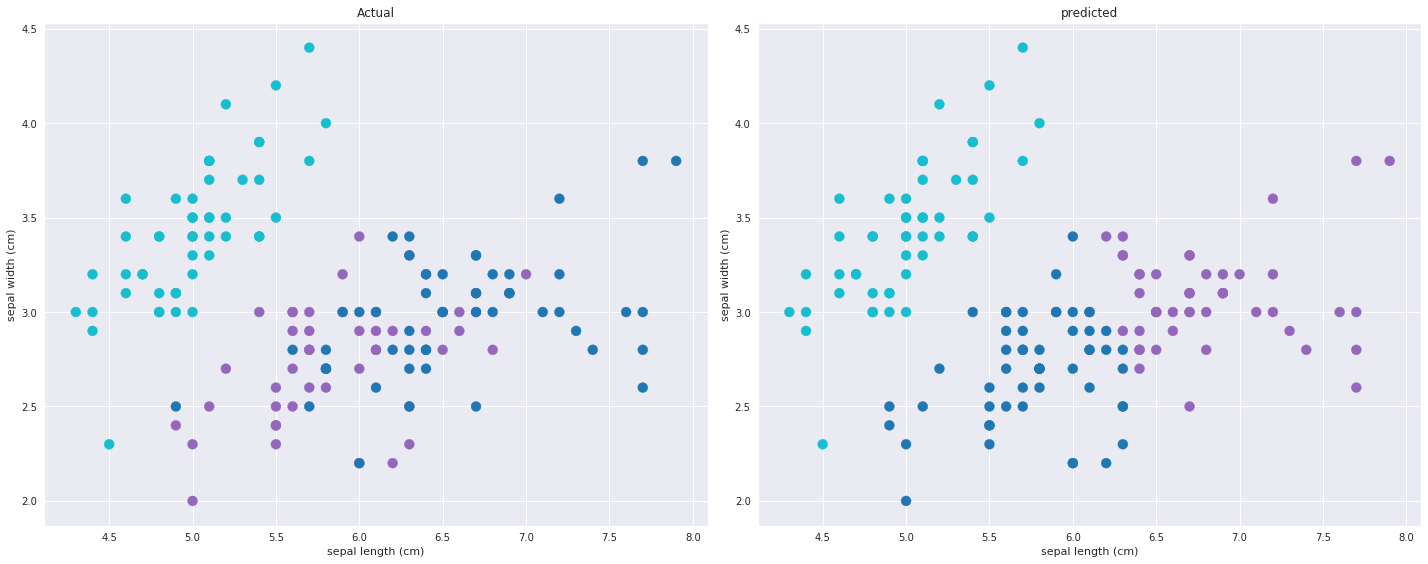

In [127]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121,)
ax1.scatter(iris_df.iloc[:,0],iris_df.iloc[:,1],c=data.target,marker='o',cmap='tab10_r',s=100)
ax1.set_title("Actual")
ax1.set_xlabel(xyz_names[0])
ax1.set_ylabel(xyz_names[1])
#ax1.set_zlabel(xyz_names[2])

ax2=fig.add_subplot(122)
ax2.scatter(iris_df.iloc[:,0],iris_df.iloc[:,1],c=pred,marker='o',cmap='tab10_r',s=100)
ax2.set_title("predicted")
ax2.set_xlabel(xyz_names[0])
ax2.set_ylabel(xyz_names[1])
#ax2.set_zlabel(xyz_names[2])
plt.tight_layout()
#plt.title("Clustering Iris dataset")
plt.show()

### γ. (10 points) Repeat the previous exercise with each possible two-dimensional axis-parallel subspace (i.e.: five more times). In which subspace does the clustering mimic the true labels of the dataset most closely? Which type of Iris most often ends up in a wrong cluster? Which records are particularly difficult to cluster?

In [134]:
from itertools import permutations,combinations
list(permutations(data.feature_names,2)),list(combinations(data.feature_names,2))


([('sepal length (cm)', 'sepal width (cm)'),
  ('sepal length (cm)', 'petal length (cm)'),
  ('sepal length (cm)', 'petal width (cm)'),
  ('sepal width (cm)', 'sepal length (cm)'),
  ('sepal width (cm)', 'petal length (cm)'),
  ('sepal width (cm)', 'petal width (cm)'),
  ('petal length (cm)', 'sepal length (cm)'),
  ('petal length (cm)', 'sepal width (cm)'),
  ('petal length (cm)', 'petal width (cm)'),
  ('petal width (cm)', 'sepal length (cm)'),
  ('petal width (cm)', 'sepal width (cm)'),
  ('petal width (cm)', 'petal length (cm)')],
 [('sepal length (cm)', 'sepal width (cm)'),
  ('sepal length (cm)', 'petal length (cm)'),
  ('sepal length (cm)', 'petal width (cm)'),
  ('sepal width (cm)', 'petal length (cm)'),
  ('sepal width (cm)', 'petal width (cm)'),
  ('petal length (cm)', 'petal width (cm)')])

iterations 1 using sepal length (cm) and sepal width (cm)
+------------+----------+--------------+-------------+
|            |   setosa |   versicolor |   virginica |
|------------+----------+--------------+-------------|
| setosa     |        0 |           50 |           0 |
| versicolor |       12 |            0 |          38 |
| virginica  |       35 |            0 |          15 |
+------------+----------+--------------+-------------+


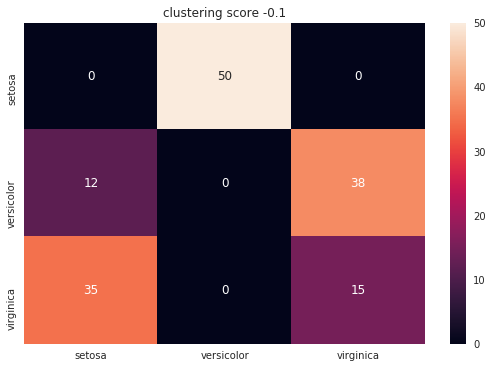

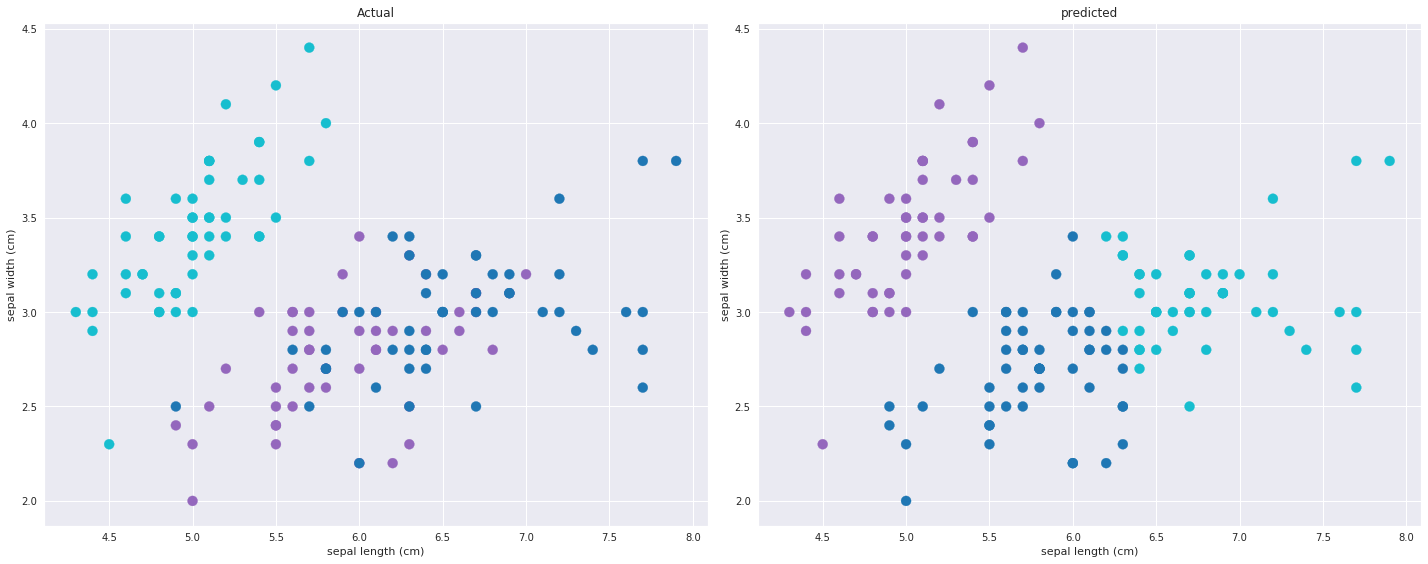

iterations 2 using sepal length (cm) and petal length (cm)
+------------+----------+--------------+-------------+
|            |   setosa |   versicolor |   virginica |
|------------+----------+--------------+-------------|
| setosa     |        0 |           50 |           0 |
| versicolor |       45 |            1 |           4 |
| virginica  |       13 |            0 |          37 |
+------------+----------+--------------+-------------+


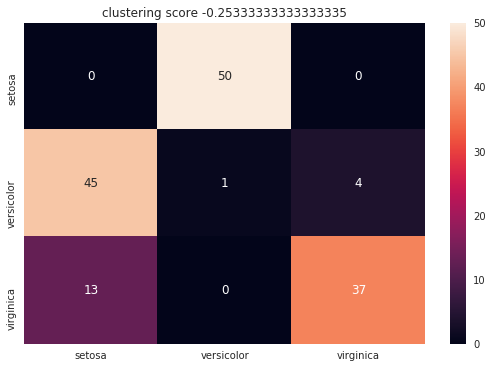

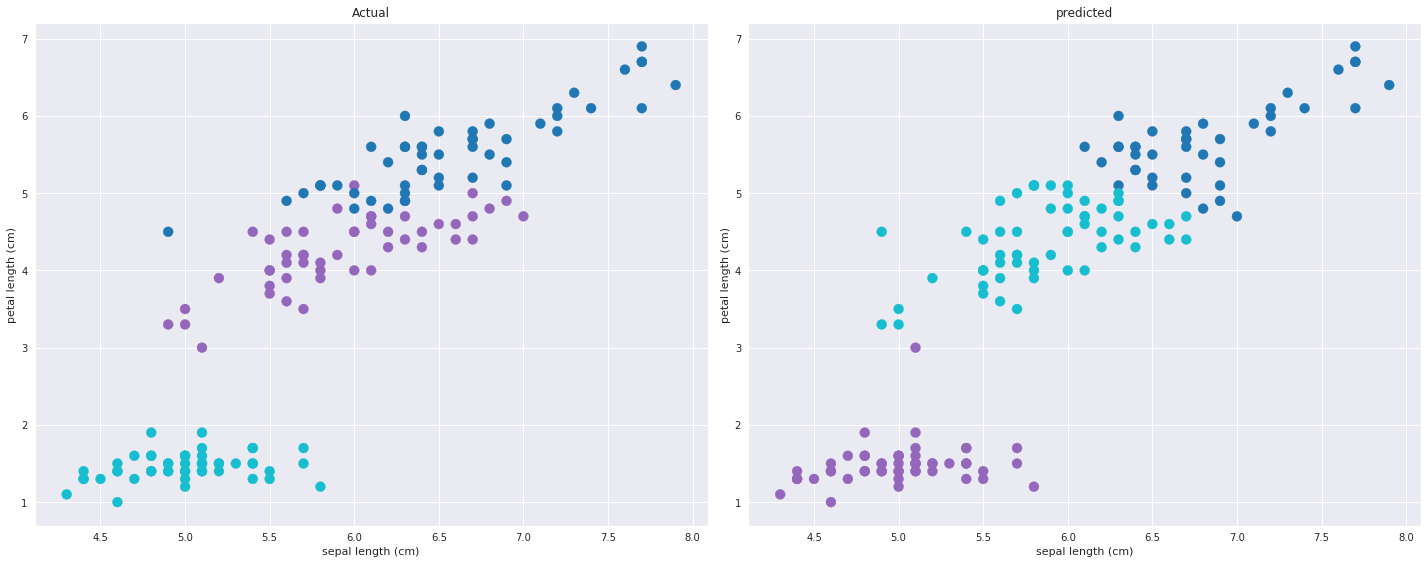

iterations 3 using sepal length (cm) and petal width (cm)
+------------+----------+--------------+-------------+
|            |   setosa |   versicolor |   virginica |
|------------+----------+--------------+-------------|
| setosa     |       50 |            0 |           0 |
| versicolor |        4 |           39 |           7 |
| virginica  |        0 |           15 |          35 |
+------------+----------+--------------+-------------+


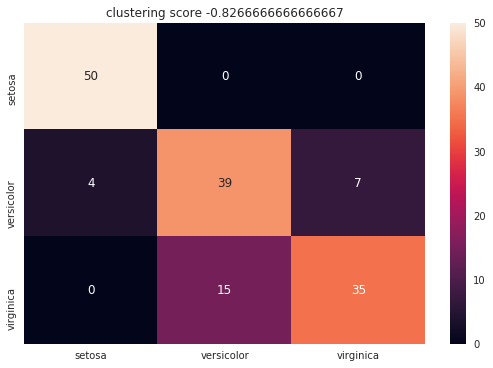

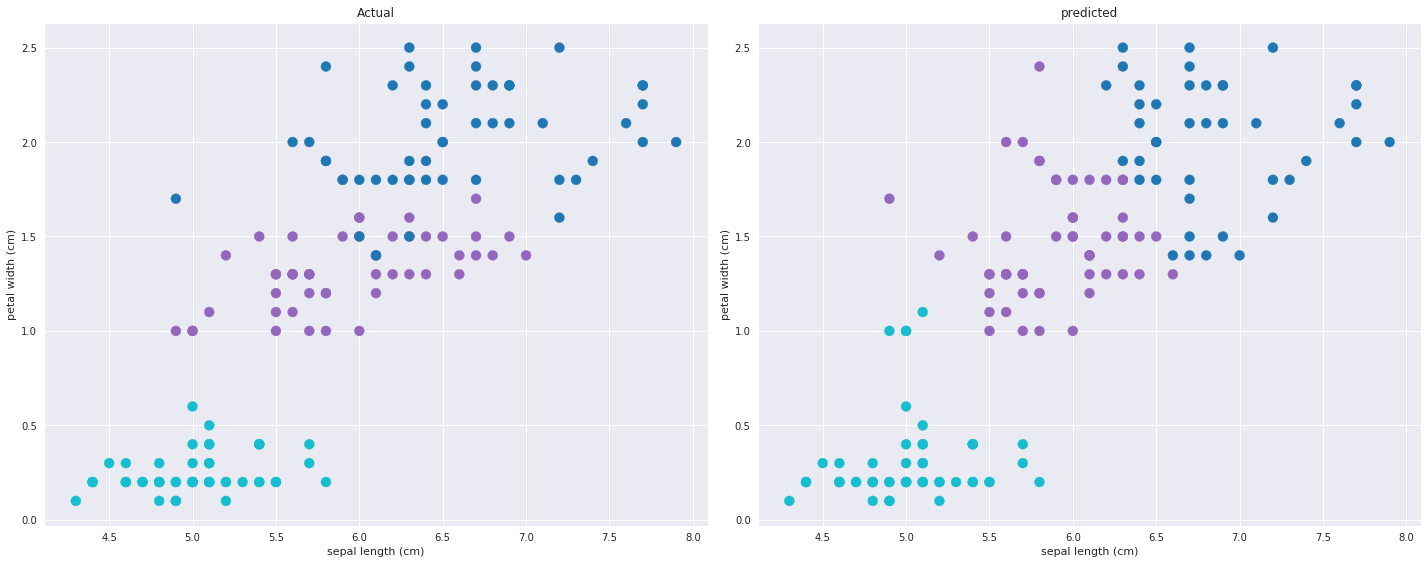

iterations 4 using sepal width (cm) and petal length (cm)
+------------+----------+--------------+-------------+
|            |   setosa |   versicolor |   virginica |
|------------+----------+--------------+-------------|
| setosa     |        0 |           50 |           0 |
| versicolor |        2 |            0 |          48 |
| virginica  |       41 |            0 |           9 |
+------------+----------+--------------+-------------+


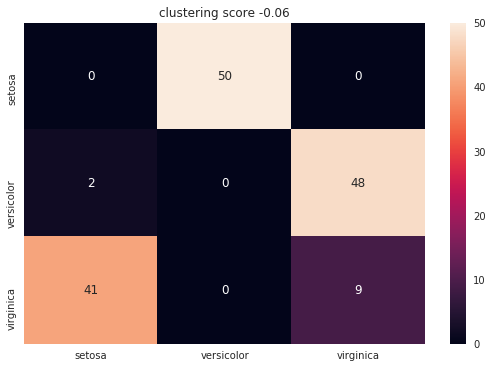

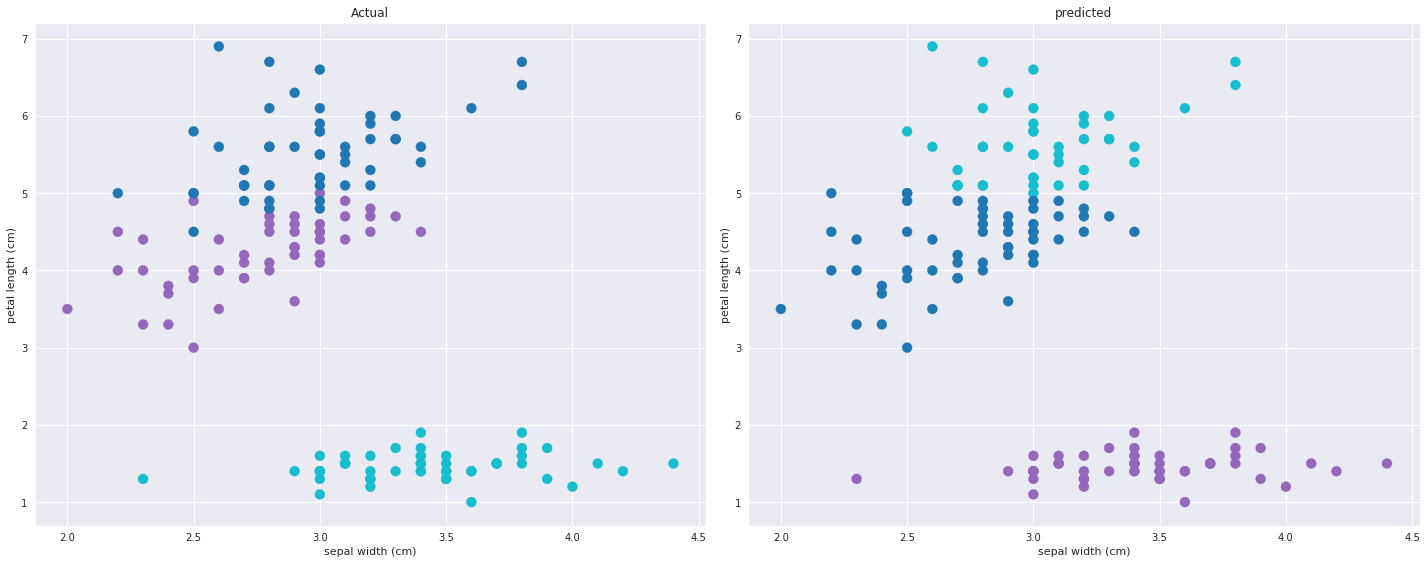

iterations 5 using sepal width (cm) and petal width (cm)
+------------+----------+--------------+-------------+
|            |   setosa |   versicolor |   virginica |
|------------+----------+--------------+-------------|
| setosa     |        1 |           49 |           0 |
| versicolor |       46 |            0 |           4 |
| virginica  |        6 |            0 |          44 |
+------------+----------+--------------+-------------+


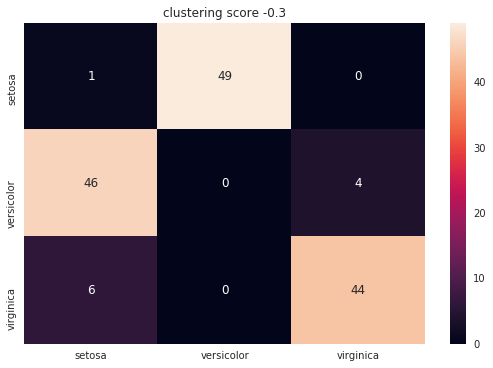

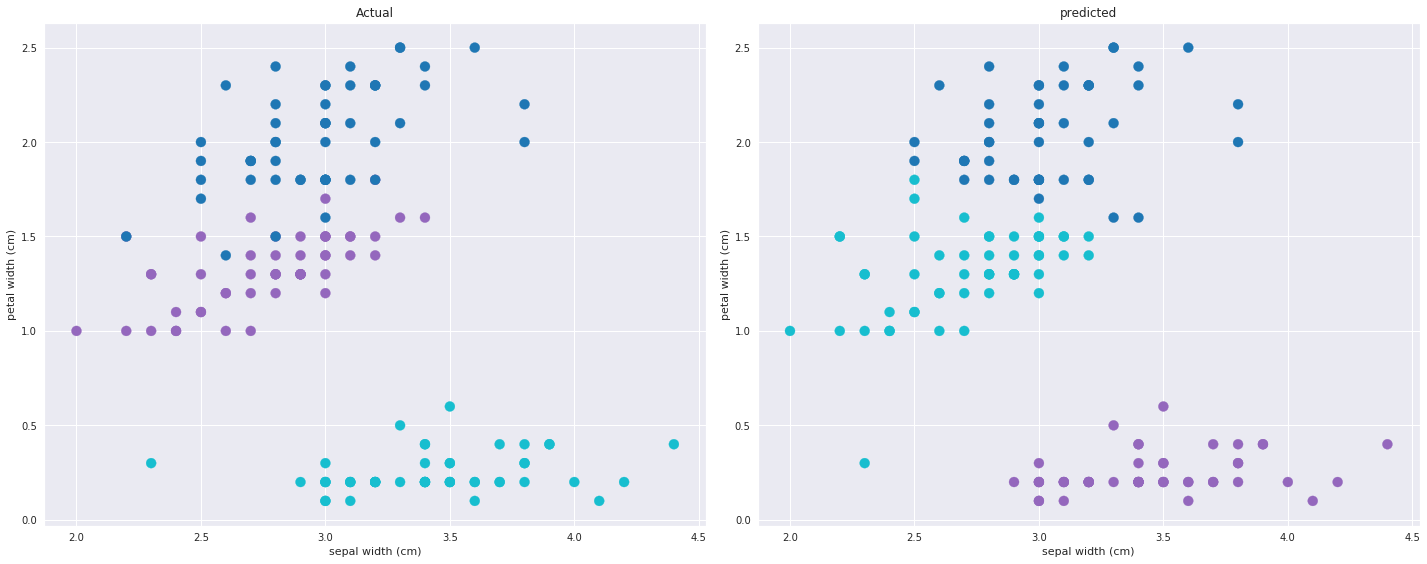

iterations 6 using petal length (cm) and petal width (cm)
+------------+----------+--------------+-------------+
|            |   setosa |   versicolor |   virginica |
|------------+----------+--------------+-------------|
| setosa     |       50 |            0 |           0 |
| versicolor |        0 |            2 |          48 |
| virginica  |        0 |           46 |           4 |
+------------+----------+--------------+-------------+


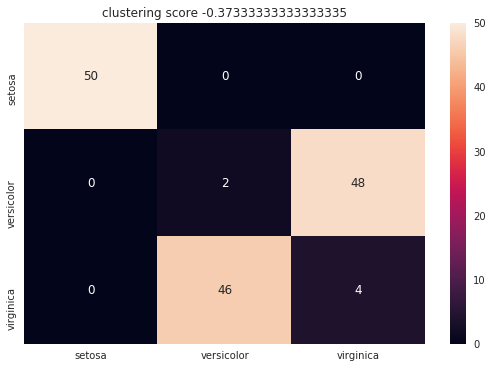

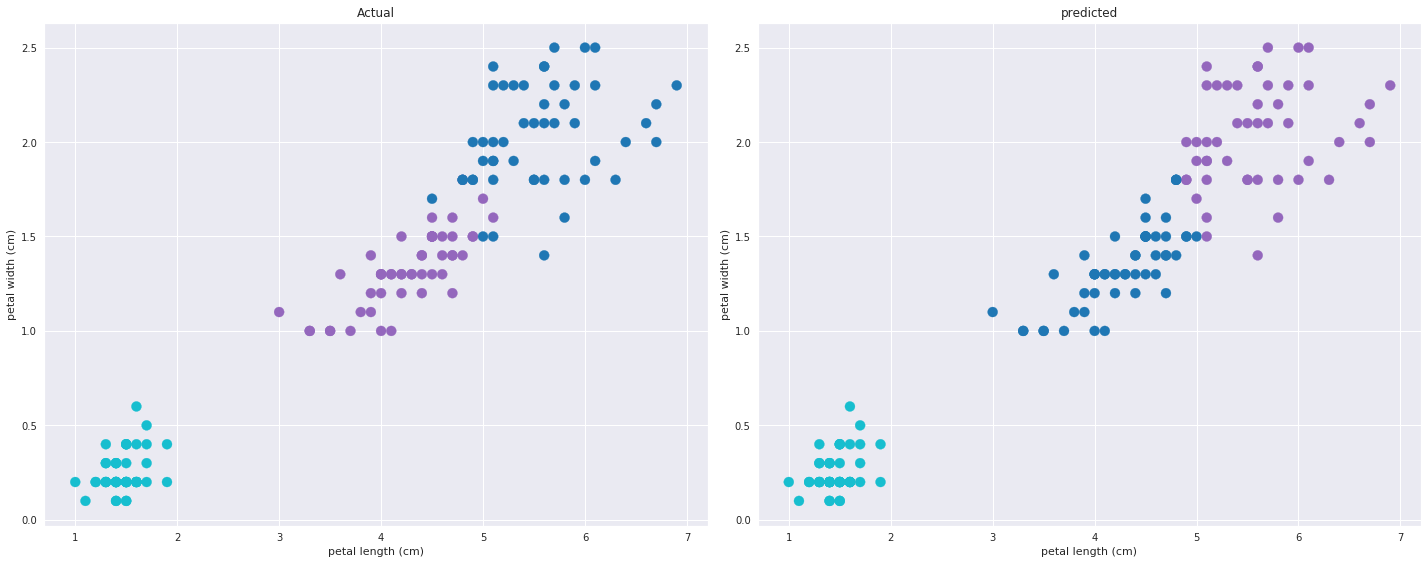

In [145]:
iterations_results={}
for idx,feat in enumerate(combinations(data.feature_names,2)):
  print(f"iterations {idx+1} using {feat[0]} and {feat[1]}")
  cluster1=KMeans(n_clusters=3)
  pred=cluster1.fit_predict(iris_df[[feat[0],feat[1]]].values)
  score=evaluate_clustering(pred)
  iterations_results[feat[0]+"_"+feat[1]]=score
  fig = plt.figure(figsize=(20,8))
  ax1 = fig.add_subplot(121,)
  ax1.scatter(iris_df[feat[0]],iris_df[feat[1]],c=data.target,marker='o',cmap='tab10_r',s=100)
  ax1.set_title("Actual")
  ax1.set_xlabel(feat[0])
  ax1.set_ylabel(feat[1])
  #ax1.set_zlabel(xyz_names[2])

  ax2=fig.add_subplot(122)
  ax2.scatter(iris_df[feat[0]],iris_df[feat[1]],c=pred,marker='o',cmap='tab10_r',s=100)
  ax2.set_title("predicted")
  ax2.set_xlabel(feat[0])
  ax2.set_ylabel(feat[1])
  #ax2.set_zlabel(xyz_names[2])
  plt.tight_layout()
  #plt.title("Clustering Iris dataset")
  plt.show()

In [146]:
print(tabulate(iterations_results.items(),headers='keys', tablefmt='psql'))

+-------------------------------------+----------+
| 0                                   |        1 |
|-------------------------------------+----------|
| sepal length (cm)_sepal width (cm)  | 0.1      |
| sepal length (cm)_petal length (cm) | 0.253333 |
| sepal length (cm)_petal width (cm)  | 0.826667 |
| sepal width (cm)_petal length (cm)  | 0.06     |
| sepal width (cm)_petal width (cm)   | 0.3      |
| petal length (cm)_petal width (cm)  | 0.373333 |
+-------------------------------------+----------+


- subspace does the clustering mimic the true labels of the dataset most closely are  

  *   petal length (cm)
  *   petal width (cm)
which gives accuracy of **0.37333**



### Which type of Iris most often ends up in a wrong cluster?
### Which records are particularly difficult to cluster?

- Have to look into the results to find above answers




In [147]:
print("*********************************ALL the Best **********************************")

*********************************ALL the Best **********************************
